# Titanic: Machine Learning from Disaster

#### Import Dependencies

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from jupyterthemes import jtplot
import csv
# jtplot.style()
%matplotlib inline

np.random.seed(1)


## Exploratory Data Analysis and Data Cleaning

In [212]:
data = pd.read_csv('train.csv')
# test_data = pd.read_csv('test.csv')

In [213]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [214]:
#check total null values in each column
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


0    549
1    342
Name: Survived, dtype: int64

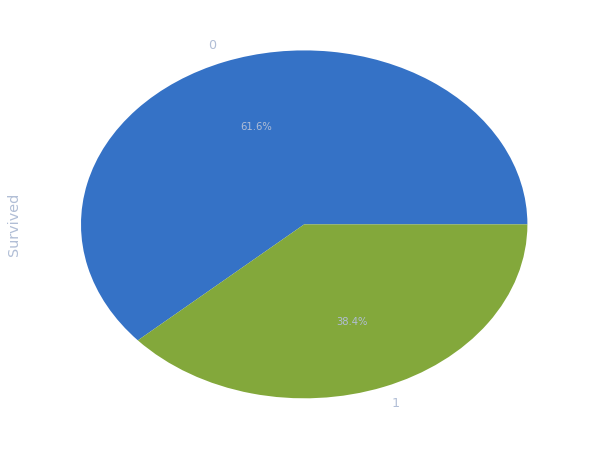

In [215]:
# plot of survival
f, ax = plt.subplots(1,figsize=(10,8))
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax);
data['Survived'].value_counts()

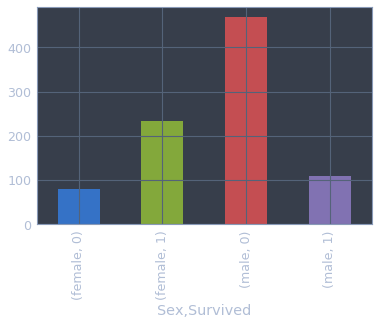

In [216]:
# see survival and sex relation
data.groupby(['Sex','Survived'])['Survived'].count().plot(kind='bar');

In [217]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [218]:
pd.crosstab([data.Sex, data.Survived], data.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [219]:
pd.crosstab(data.SibSp, data.Survived, margins=True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [220]:
pd.crosstab(data.Parch, data.Survived, margins=True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


In [221]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [222]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

In [223]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.6991176471 Years


In [224]:
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.', expand=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Range,Fare_cat,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.91]",0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(31.0, 512.329]",3,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.91, 14.454]",1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(31.0, 512.329]",3,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(7.91, 14.454]",1,Mr


In [225]:
data.groupby('Initial')['Name'].count()

Initial
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: Name, dtype: int64

In [226]:
# there are some errors in data, let's fix them
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss', 'Miss', 'Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [227]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [228]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [229]:
data.Age.isnull().any() #check for nan values in age

False

In [230]:
data['Embarked'].fillna('S',inplace=True)

In [231]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

In [232]:
data['Family_Size'] = data['Parch'] + data['SibSp'] + 1
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [233]:
data['Age_band'].value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


In [234]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Range,Fare_cat,Initial,Age_band,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,"(-0.001, 7.91]",0,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,"(31.0, 512.329]",3,1,2,2


## Predictive Modeling

## DNN 

#### Initializing parameters with `he initialization`

In [235]:
def Initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    for l in range(1, len(layer_dims)):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

### Activation Functions

In [236]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-1 * Z))

def relu(Z):
    return np.maximum(0, Z)

### Forward Propogation

In [237]:
def linear_activation_forward(A_prev, W, b, activation):
    Z = np.dot(W, A_prev) + b
    linear_cache = (A_prev, W, b)

    if activation == 'sigmoid':
        A = sigmoid(Z)
    elif activation == 'relu':
        A = relu(Z)
        
    activation_cache = Z
    cache = (linear_cache, activation_cache)
    return A, cache

In [238]:
def forward_propogation(X, parameters):
    
    A_prev = X
    L = len(parameters)//2
    caches = []
    for l in range(1, L):
        Wl = parameters['W' + str(l)]
        bl = parameters['b' + str(l)]
        A_prev, cache = linear_activation_forward(A_prev, Wl, bl, 'relu')
        caches.append(cache)

    AL, cache = linear_activation_forward(A_prev, parameters['W' + str(L)], parameters['b' + str(L)], 'sigmoid')
    caches.append(cache)
    return AL, caches


### Cost Computation

In [239]:
#np.mulliply is diff than X*Y

def compute_cost(AL, Y): #cross_entropy_cost
    m = Y.shape[1]
    cost = -1 / m * np.sum((Y * np.log(AL) + ((1 - Y) * np.log(1 - AL))))
    cost = np.squeeze(cost)
    return cost

def compute_cost_with_regularization(AL, Y, parameters, lambd):
    m = Y.shape[1]
    cost = 0
    for l in range(1, len(parameters)//2):
        cost += np.sum(np.square(parameters['W' + str(l)]))

    cross_entropy_cost = compute_cost(AL, Y)
    L2_regularization_cost = lambd * cost / (2 * m)

    return  cross_entropy_cost + L2_regularization_cost


### Backward Propogation

In [240]:
def sigmoid_backward(dA, activation_cache):
    Z = activation_cache
    A = sigmoid(Z)
    dZ = dA * A * (1 - A)
    return dZ

In [241]:
def relu_backward(dA, activation_cache):
    Z = activation_cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

In [242]:
def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)
    elif activation == 'relu':
        dZ = relu_backward(dA, activation_cache)
        
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    dW = 1 / m * np.dot(dZ, A_prev.T)
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db


In [243]:
def backward_propogation(AL, Y, caches):
    L = len(caches)
    grads = {}
    dAL = - np.divide(Y, AL) + np.divide(1 - Y, 1 - AL)
    grads['dA' + str(L)], grads['dW' + str(L)], grads['db' + str(L)] = linear_activation_backward(dAL, caches[L-1], 'sigmoid')
    A_prev = AL
    for l in range(L-1, 0, -1):
        cache = caches[l-1]
        dA = grads['dA' + str(l+1)]
        dA_prev, dW, db = linear_activation_backward(dA, cache, 'relu')
        grads['dA' + str(l)] = dA_prev
        grads['dW' + str(l)] = dW
        grads['db' + str(l)] = db
        
    return grads

In [316]:
def backward_propogation_with_regularization(AL, Y, caches, lambd):
    L = len(caches)
    grads = {}
    m = Y.shape[1]
    dAL = - np.divide(Y, AL) + np.divide(1 - Y, 1 - AL)
    grads['dA' + str(L)], grads['dW' + str(L)], grads['db' + str(L)] = linear_activation_backward(dAL, caches[L-1], 'sigmoid')
    grads['dW' + str(L)] += (lambd * caches[L-1][0][1]) / m
    A_prev = AL

    for l in range(L-1, 0, -1):
        cache = caches[l-1]
        dA = grads['dA' + str(l+1)]
        dA_prev, dW, db = linear_activation_backward(dA, cache, 'relu')
        grads['dA' + str(l)] = dA_prev
        grads['dW' + str(l)] = dW + (lambd * cache[0][1]) / m
        grads['db' + str(l)] = db
        
    return grads

### Updating parameters

In [245]:
def update_parameters(parameters, grads, learning_rate):
    for l in range(1, len(parameters)//2 + 1 ):
        parameters['W' + str(l)] -= learning_rate * grads['dW' + str(l)]
        parameters['b' + str(l)] -= learning_rate * grads['db' + str(l)]
    return parameters

### Building the model

In [246]:
def the_model(X, Y, layers_dims, learning_rate, num_iterations, lambd):
    
    np.random.seed(1)
    costs = []
    
    parameters = Initialize_parameters_deep(layers_dims)
#     parameters = np.load('parameters.npy').item()
    for i in range(num_iterations+1):
        AL, caches = forward_propogation(X, parameters)
        if lambd == 0:
            cost = compute_cost(AL, Y)
            grads = backward_propogation(AL, Y, caches)
        else:
            cost = compute_cost_with_regularization(AL, Y, parameters, lambd)
            grads = backward_propogation_with_regularization(AL, Y, caches, lambd)
            
        parameters = update_parameters(parameters, grads, learning_rate)
        if (i%20000==0):
            print('Cost at iteration %s is %s' %(i, cost))
        if (i%1000==0):
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per 10000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    np.save("parameters", parameters)
    return parameters


### Accuracy Prediction function

In [349]:
def predictAccuracy(X, Y, parameters):
    
    m = X.shape[1]
    p = np.zeros((1, m))
    probas, caches = forward_propogation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
    
    print("Accuracy: "  + str(np.sum((p == Y)) / m))
        
    return np.squeeze(p)

## Training the model

### Preparing train and test set

In [248]:
train, test = train_test_split(data, test_size=0.3,random_state=0,stratify=data['Survived'])

X_train = train[['Pclass', 'Sex', 'Age_band', 'Embarked', 'Initial','Fare_cat', 'Family_Size']].values
X_train = X_train.T.astype(float)
X_test = test[['Pclass', 'Sex', 'Age_band', 'Embarked', 'Initial', 'Fare_cat', 'Family_Size']].values
X_test = X_test.T.astype(float)

Y_train = train['Survived'].values
Y_train = Y_train.reshape(1, Y_train.shape[0])

Y_test = test['Survived'].values
Y_test = Y_test.reshape(1, Y_test.shape[0])
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(7, 623) (7, 268)
(1, 623) (1, 268)


Cost at iteration 0 is 1.21478899953
Cost at iteration 20000 is 0.48384413601
Cost at iteration 40000 is 0.456577115241
Cost at iteration 60000 is 0.441994052209
Cost at iteration 80000 is 0.434501331063
Cost at iteration 100000 is 0.428970066093


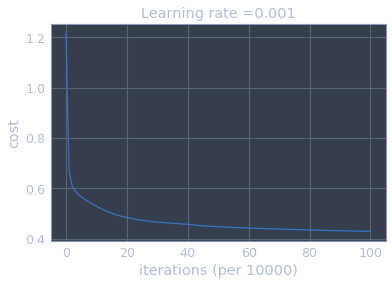

CPU times: user 30.4 s, sys: 112 ms, total: 30.5 s
Wall time: 30.4 s


In [362]:
%%time
layers_dims = [7, 6, 1]
learning_rate = 0.001
num_iterations = 100000
lambd = 0.9
parameters = the_model(X_train, Y_train, layers_dims, learning_rate, num_iterations, lambd)

## Accuracy Prediction

In [360]:
%%time
prob = predictAccuracy(X_train, Y_train, parameters)

Accuracy: 0.815409309791
CPU times: user 341 µs, sys: 55 µs, total: 396 µs
Wall time: 991 µs


In [361]:
%%time
prob = predictAccuracy(X_test, Y_test, parameters)

Accuracy: 0.80223880597
CPU times: user 264 µs, sys: 822 µs, total: 1.09 ms
Wall time: 750 µs


In [354]:
np.save("parameters-v2", parameters)

## Evaluation Time!

### Test Data cleaning

In [284]:
test_data = pd.read_csv('test.csv')

In [285]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [286]:
test_data['Initial'] = test_data.Name.str.extract('([A-Za-z]+)\.', expand=True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [287]:
test_data.groupby('Initial')['Age'].count()

Initial
Col         2
Dona        1
Dr          1
Master     17
Miss       64
Mr        183
Mrs        62
Ms          0
Rev         2
Name: Age, dtype: int64

In [288]:
test_data['Initial'].replace(['Col', 'Dona','Dr', 'Ms', 'Rev'], ['Other', 'Miss', 'Mr', 'Miss', 'Other'], inplace=True)
test_data.groupby('Initial')['Age'].count()

Initial
Master     17
Miss       65
Mr        184
Mrs        62
Other       4
Name: Age, dtype: int64

In [289]:
test_data.groupby('Initial')['Age'].mean()

Initial
Master     7.406471
Miss      22.039846
Mr        32.114130
Mrs       38.903226
Other     42.750000
Name: Age, dtype: float64

In [290]:
## Assigning the NaN Values with the Ceil values of the mean ages
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mr'),'Age']=33
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mrs'),'Age']=39
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Master'),'Age']=7
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Miss'),'Age']=22
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Other'),'Age']=43

In [291]:
test_data['Age_band']=0
test_data.loc[test_data['Age']<=16,'Age_band']=0
test_data.loc[(test_data['Age']>16)&(test_data['Age']<=32),'Age_band']=1
test_data.loc[(test_data['Age']>32)&(test_data['Age']<=48),'Age_band']=2
test_data.loc[(test_data['Age']>48)&(test_data['Age']<=64),'Age_band']=3
test_data.loc[test_data['Age']>64,'Age_band']=4

In [292]:
data['Age_band'].value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


In [293]:
test_data['Fare_cat'] = 0
test_data.loc[test_data['Fare'] <= 7.91, 'Fare_cat'] = 0
test_data.loc[(test_data['Fare'] > 7.91) & (test_data['Fare'] <= 14.454), 'Fare_cat'] = 1
test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare'] <= 31), 'Fare_cat'] = 2
test_data.loc[(test_data['Fare'] > 31) & (test_data['Fare'] <= 513), 'Fare_cat'] = 3

In [294]:
test_data['Family_Size'] = data['Parch'] + data['SibSp'] + 1
test_data['Sex'].replace(['male','female'],[0,1],inplace=True)
test_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Run Model on Test data

In [295]:
X = test_data[['Pclass', 'Sex', 'Age_band', 'Embarked', 'Initial', 'Fare_cat', 'Family_Size']].values
X = X.T.astype(float)
X.shape

(7, 418)

In [356]:
def predict(X, parameters):
    m = X.shape[1]
    p = np.zeros((1, m))
    probas, caches = forward_propogation(X, parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0

    return np.squeeze(p)

In [357]:
Y = predict(X, parameters)

#### Generate csv file for submission

In [358]:
with open('submission-v2.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['PassengerId', 'Survived'])
    for index, row in test_data.iterrows():
        writer.writerow([row['PassengerId'], int(Y[index])])    